## Javier Al Faiza - 

#### Assignment 1 Hacktivate Data Science Python

In [34]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import folium
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

print('Matplotlib version:', mpl.__version__)

mpl.style.use('ggplot') 

Matplotlib version: 3.7.2


In [18]:
df = pd.read_csv('./dataset/london_crime_by_lsoa.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [22]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [28]:
df.shape

(13490604, 7)

In [29]:
df.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

In [16]:
df.isna().values.any()

False

In [31]:
df.head(8)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4


In [32]:
df.tail(8)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [25]:
df.describe(include='all')

,lsoa_code,borough,major_category,minor_category,value,year,month
count,13490604,13490604,13490604,13490604,1.349060e+07,1.349060e+07,1.349060e+07
unique,4835,33,9,32,NaN,NaN,NaN
top,E01003689,Croydon,Theft and Handling,Common Assault,NaN,NaN,NaN
freq,3456,602100,3966300,522180,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.779444e-01,2.012000e+03,6.500000e+00
std,NaN,NaN,NaN,NaN,1.771513e+00,2.581989e+00,3.452053e+00
min,NaN,NaN,NaN,NaN,0.000000e+00,2.008000e+03,1.000000e+00
25%,NaN,NaN,NaN,NaN,0.000000e+00,2.010000e+03,3.750000e+00
50%,NaN,NaN,NaN,NaN,0.000000e+00,2.012000e+03,6.500000e+00
75%,NaN,NaN,NaN,NaN,1.000000e+00,2.014000e+03,9.250000e+00


## Area Plot

In [113]:
borough = pd.DataFrame({'borough': ['Bromley', 'Merton', 'Croydon', 'Greenwich', 'Sutton']})

In [27]:
pivot_df_agg = df_agg.pivot(index='year', columns='borough', values='value')
pivot_df_agg.columns.name = None
pivot_df_agg    

NameError: name 'df_agg' is not defined

## Word Clouds

In [37]:
# create a dataframe for wordcloud

# get the data
borough_data = df.groupby(by='borough')['value'].sum().reset_index()

# add new columns for new dataframe
borough_wc = borough_data[['borough', 'value']]
borough_wc

,borough,value
0,Barking and Dagenham,149447
1,Barnet,212191
2,Bexley,114136
3,Brent,227551
4,Bromley,184349
5,Camden,275147
6,City of London,780
7,Croydon,260294
8,Ealing,251562
9,Enfield,193880


In [38]:
# prepared data for wordcloud
wc_dict = dict(zip(borough_wc['borough'], borough_wc['value']))
wc_dict

{'Barking and Dagenham': 149447,
 'Barnet': 212191,
 'Bexley': 114136,
 'Brent': 227551,
 'Bromley': 184349,
 'Camden': 275147,
 'City of London': 780,
 'Croydon': 260294,
 'Ealing': 251562,
 'Enfield': 193880,
 'Greenwich': 181568,
 'Hackney': 217119,
 'Hammersmith and Fulham': 185259,
 'Haringey': 213272,
 'Harrow': 116848,
 'Havering': 138947,
 'Hillingdon': 209680,
 'Hounslow': 186772,
 'Islington': 230286,
 'Kensington and Chelsea': 171981,
 'Kingston upon Thames': 89306,
 'Lambeth': 292178,
 'Lewisham': 215137,
 'Merton': 115654,
 'Newham': 262024,
 'Redbridge': 183562,
 'Richmond upon Thames': 96771,
 'Southwark': 278809,
 'Sutton': 100987,
 'Tower Hamlets': 228613,
 'Waltham Forest': 203879,
 'Wandsworth': 204741,
 'Westminster': 455028}

In [39]:
# create wordcloud
london_wordcloud = WordCloud(width=800,
                             height=400,
                             background_color='white'
                             ).generate_from_frequencies(wc_dict)

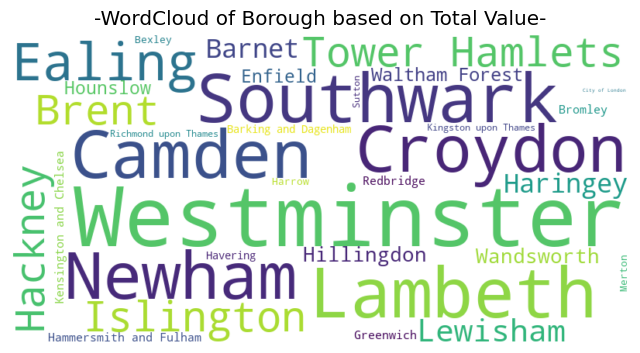

In [42]:
# create wordcloud figure and show
plt.figure(figsize=(8, 7))
plt.imshow(london_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('-WordCloud of Borough based on Total Value-')
plt.show()

## Folium Maps

In [53]:
world_map = folium.Map()
world_map

In [102]:
# define the world map centered around Semarang with a higher zoom level
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=10)

# display world map
london_map

In [56]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

In [94]:
for lat, lng in df["borough"].apply(eval):
    print(lat, lng)
    break   

NameError: name 'Croydon' is not defined

<Axes: >

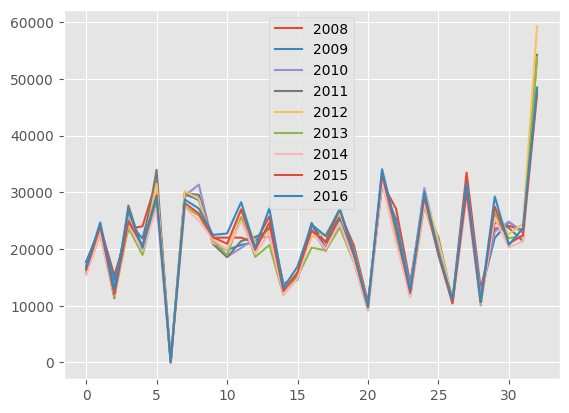

In [95]:
new_df4 = df.pivot_table(index='borough', columns='year', values='value', aggfunc='sum').reset_index()
new_df4.columns.name = None
new_df4.plot()

In [63]:
new_df4.index


RangeIndex(start=0, stop=33, step=1)

In [70]:
# add new column 'Total'
new_df4['Total'] = new_df4.loc[:, 2008:2016].sum(axis=1)

In [86]:
# download countries geojson file
!curl https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json -O data/world_countries.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  246k    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  246k  100  246k    0     0   392k      0 --:--:-- --:--:-- --:--:--  393k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0curl: (6) Could not resolve host: data


In [109]:
world_geo = r'london_boroughs.json' # geojson file

# create a plain world map 
world_map = folium.Map(location=[51.5074, -0.1278], zoom_start=10, tiles='cartodb positron')


In [110]:
# generate choropleth map using total value of crime  each borough from 2008 to 2016
world_map.choropleth(
    geo_data=world_geo,
    data=new_df4,
    columns=['borough','Total'],
    key_on='feature.properties.name',
    fill_color='BuPu',  # Blue-Purple
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Value of Crime'
)

# display map
world_map

C:\Users\Gavinesia Sukses\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


KeyError: 'Total'